<a href="https://colab.research.google.com/github/dimaszuda/Prediction-of-Students-Performance/blob/main/Prediksi_Nilai_PAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from matplotlib import pyplot as plt
from scipy.stats import spearmanr

In [ ]:
df = pd.ExcelFile('Nilai PAS siswa.xlsx').parse('Data Olah')

In [ ]:
df.head(5)

,Timestamp,Gender,1,2,3,4,5,6,7,8,...,19,20,21,22,23,24,25,Score,Essay,Nilai PAS
0,2022-11-28 08:16:09.903,P,0,0,0,0,0,0,0,0,...,0,1,1,1,0,1,0,6,10.0,28.0
1,2022-11-28 08:27:51.226,P,1,0,1,0,1,1,0,0,...,1,1,1,0,0,1,1,16,17.0,65.0
2,2022-11-28 08:28:12.123,P,1,0,0,0,0,0,0,0,...,1,1,1,1,0,0,1,10,10.0,40.0
3,2022-11-28 08:28:33.189,L,1,0,0,0,1,1,1,1,...,1,1,1,1,0,1,1,17,10.0,61.0
4,2022-11-28 08:28:58.164,L,0,1,1,1,1,1,1,0,...,1,1,1,1,0,1,1,21,13.0,76.0


In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [ ]:
time = df['Timestamp'].dt.time

In [ ]:
df.insert(1, 'time', time)

In [ ]:
df.head(2)

,Timestamp,time,Gender,1,2,3,4,5,6,7,...,19,20,21,22,23,24,25,Score,Essay,Nilai PAS
0,2022-11-28 08:16:09.903,08:16:09.903000,P,0,0,0,0,0,0,0,...,0,1,1,1,0,1,0,6,10.0,28.0
1,2022-11-28 08:27:51.226,08:27:51.226000,P,1,0,1,0,1,1,0,...,1,1,1,0,0,1,1,16,17.0,65.0


In [ ]:
def times(text):
  time_obj = datetime.strptime(str(text), "%H:%M:%S.%f")
  hour = time_obj.hour
  minute = time_obj.minute
  text = ((hour - 8)*60) + minute + 30
  return text

In [ ]:
df['time'] = df['time'].apply(times)

In [ ]:
df.head(5)

,Timestamp,time,Gender,1,2,3,4,5,6,7,...,19,20,21,22,23,24,25,Score,Essay,Nilai PAS
0,2022-11-28 08:16:09.903,46,P,0,0,0,0,0,0,0,...,0,1,1,1,0,1,0,6,10.0,28.0
1,2022-11-28 08:27:51.226,57,P,1,0,1,0,1,1,0,...,1,1,1,0,0,1,1,16,17.0,65.0
2,2022-11-28 08:28:12.123,58,P,1,0,0,0,0,0,0,...,1,1,1,1,0,0,1,10,10.0,40.0
3,2022-11-28 08:28:33.189,58,L,1,0,0,0,1,1,1,...,1,1,1,1,0,1,1,17,10.0,61.0
4,2022-11-28 08:28:58.164,58,L,0,1,1,1,1,1,1,...,1,1,1,1,0,1,1,21,13.0,76.0


In [ ]:
df.drop(df.columns[[0]], axis=1, inplace=True)

In [ ]:
df['Gender'].map(lambda x: {1: 'L', 2: 'P'}.get(x))

0      None
1      None
2      None
3      None
4      None
       ... 
175    None
176    None
177    None
178    None
179    None
Name: Gender, Length: 180, dtype: object

In [ ]:
df = pd.get_dummies(df, prefix='', prefix_sep='')

In [ ]:
X = df.drop('Nilai PAS', axis=1)

In [ ]:
column_name = X.columns.tolist()
gender_column = column_name[-2:]
column_name = gender_column + column_name[:-2]

In [ ]:
import seaborn as sns

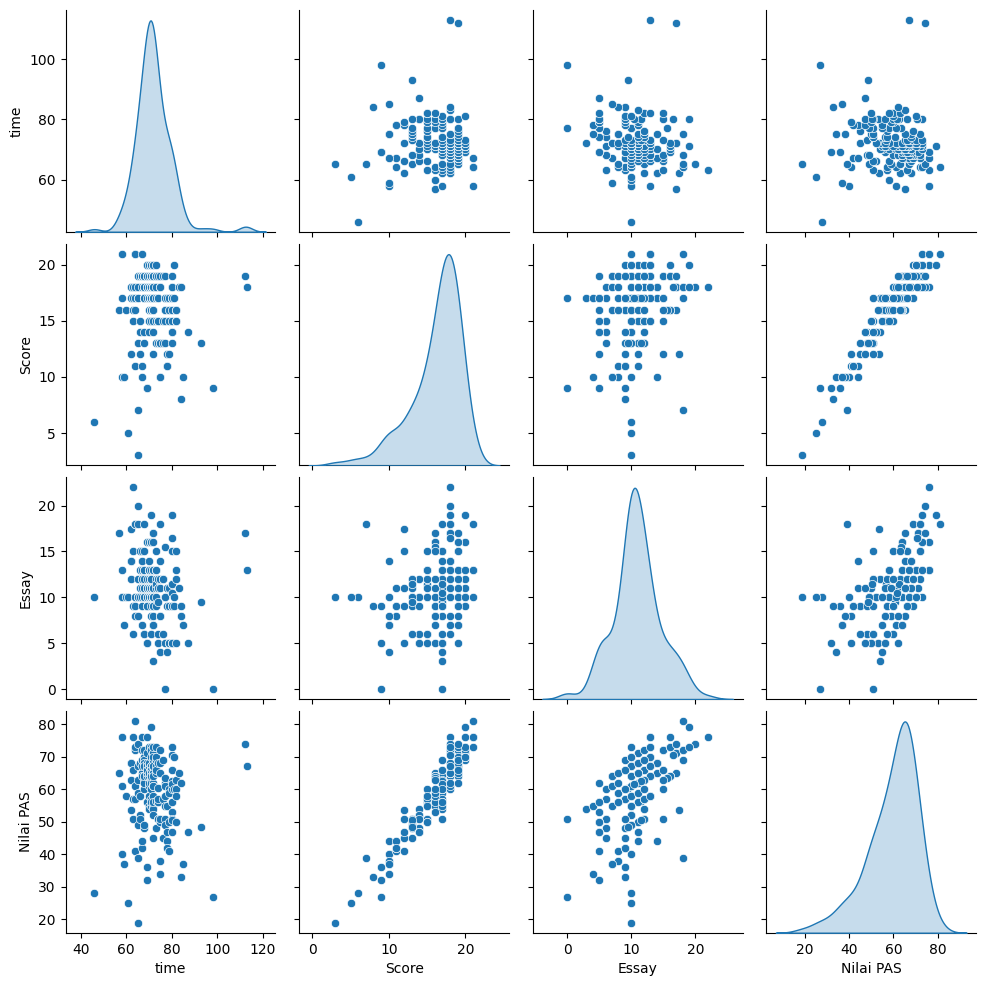

In [ ]:
sns.pairplot(df[["time", "Score", "Essay", "Nilai PAS"]], diag_kind="kde")

In [ ]:
data = df[['time', 'Score', 'Essay', 'Nilai PAS']]

In [ ]:
correlation_matrix = data.corr()

In [ ]:
correlation_matrix

,time,Score,Essay,Nilai PAS
time,1.000000,0.007127,-0.177408,-0.051447
Score,0.007127,1.000000,0.247663,0.949169
Essay,-0.177408,0.247663,1.000000,0.540035
Nilai PAS,-0.051447,0.949169,0.540035,1.000000


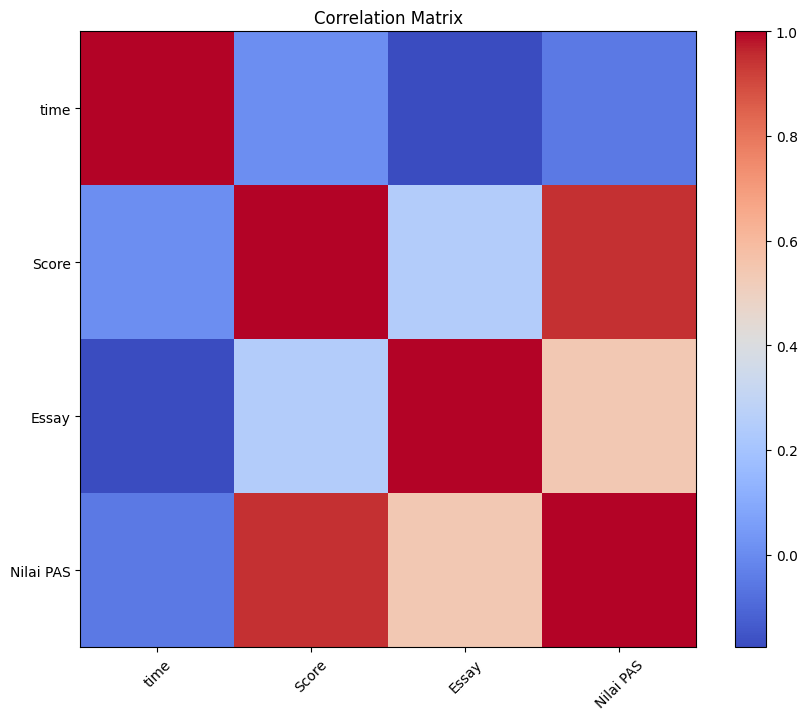

In [ ]:
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df.head()

,time,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,Score,Essay,Nilai PAS,L,P
0,46,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,6,10.0,28.0,0,1
1,57,1,0,1,0,1,1,0,0,1,...,1,0,0,1,1,16,17.0,65.0,0,1
2,58,1,0,0,0,0,0,0,0,1,...,1,1,0,0,1,10,10.0,40.0,0,1
3,58,1,0,0,0,1,1,1,1,1,...,1,1,0,1,1,17,10.0,61.0,1,0
4,58,0,1,1,1,1,1,1,0,1,...,1,1,0,1,1,21,13.0,76.0,1,0


In [ ]:
X = X.reindex(columns=column_name)

In [ ]:
y = df['Nilai PAS'].values.reshape(-1, 1)

In [ ]:
X.columns = X.columns.astype(str)

In [ ]:
X = X[[
    'time',
    'L',
    'P',
    'Score',
    'Essay'
]]

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X = scaler.fit_transform(X)

In [ ]:
X = pd.DataFrame(X, columns=[[
    'time',
    'L',
    'P',
    'Score',
    'Essay'
]])

In [ ]:
y = scaler.fit_transform(y)

In [ ]:
y = pd.DataFrame(y, columns=['Nilai PAS'])

In [ ]:
def build_model():
  model = tf.keras.Sequential([
      tf.keras.layers.Input(shape=(5)),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(16, activation='relu'),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
  model.compile(
      loss='mae',
      optimizer = optimizer,
      metrics = ['mse']
  )

  return model

In [ ]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                192       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 32)                544       
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,297
Trainable params: 1,297
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X, y, epochs=200)

Epoch 1/200
6/6 [==============================] - 2s 6ms/step - loss: 0.1805 - mse: 0.0439
Epoch 2/200
6/6 [==============================] - 0s 4ms/step - loss: 0.1657 - mse: 0.0380
Epoch 3/200
6/6 [==============================] - 0s 4ms/step - loss: 0.1528 - mse: 0.0338
Epoch 4/200
6/6 [==============================] - 0s 4ms/step - loss: 0.1446 - mse: 0.0313
Epoch 5/200
6/6 [==============================] - 0s 4ms/step - loss: 0.1365 - mse: 0.0296
Epoch 6/200
6/6 [==============================] - 0s 4ms/step - loss: 0.1306 - mse: 0.0287
Epoch 7/200
6/6 [==============================] - 0s 4ms/step - loss: 0.1269 - mse: 0.0288
Epoch 8/200
6/6 [==============================] - 0s 4ms/step - loss: 0.1256 - mse: 0.0293
Epoch 9/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1233 - mse: 0.0290
Epoch 10/200
6/6 [==============================] - 0s 4ms/step - loss: 0.1209 - mse: 0.0278
Epoch 11/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1190 

In [ ]:
def plot_history(history, title, xlabel='epochs', ylabel='mae mse'):
  plt.figure(figsize=(10, 6))
  plt.plot(history.history['loss'], 'b')
  plt.plot(history.history['mse'], 'r')
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.legend(['mae', 'mse', 'val_mae', 'val_mse'], loc='upper right', fontsize='15')
  plt.show()

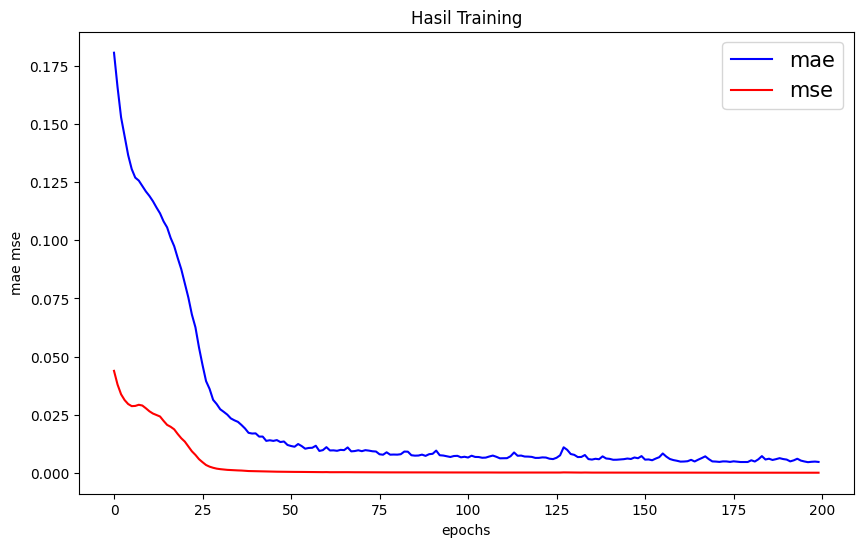

In [ ]:
plot_history(history, "Hasil Training")

In [ ]:
metric = model.get_metrics_result()

In [ ]:
metric

{'loss': <tf.Tensor: shape=(), dtype=float32, numpy=0.0047458704>,
 'mse': <tf.Tensor: shape=(), dtype=float32, numpy=0.00011335544>}

In [ ]:
prediksi = model.predict(X)

6/6 [==============================] - 0s 2ms/step


In [ ]:
corr, _ = spearmanr(y, prediksi)

In [ ]:
corr

0.9993459560195241

In [ ]:
skor = df['Score']

In [ ]:
prediksi = scaler.inverse_transform(prediksi)

In [ ]:
aktual = scaler.inverse_transform(y)

In [ ]:
data_test = pd.DataFrame(aktual, columns=['Nilai Pas aktual'])

In [ ]:
data_test['prediksi Nilai PAS'] = prediksi

In [ ]:
data_test.to_excel('prediksi performa siswa.xlsx', index=False)